In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 30 11:45:18 2020

@author: Rohit
"""

#Importing libraries


import pandas as pd
import numpy as np
import urllib
import json                 # Used to load data into JSON format
from pprint import pprint   # pretty-print
from urllib.request import Request, urlopen
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo 
import plotly
import seaborn as sns;
import category_encoders as ce  # for encoding data
import copy 
import matplotlib.pyplot
from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool
import dask.dataframe as dd
from dask import dataframe as dd 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Rohit\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy



In [3]:
pool = ThreadPool(4)

In [4]:
# Fetching data from API



#req = Request('https://api.rootnet.in/covid19-in/stats/history', headers={'User-Agent': 'Mozilla/5.0'})
urls = [
  'https://api.rootnet.in/covid19-in/stats/history',
  'https://api.rootnet.in/covid19-in/stats/testing/history'
  ]
start=time.time()
results = pool.map(urlopen, urls)

webpage = results[0].read()
json_data = json.loads(webpage)
webpage2 =  results[1].read()
json_data2 = json.loads(webpage2)['data']

end=time.time()
print(f"Runtime of the program is {end - start}")



Runtime of the program is 1.3127803802490234


In [5]:

url1='https://api.rootnet.in/covid19-in/stats/history'
url2='https://api.rootnet.in/covid19-in/stats/history'
start2=time.time()
req = Request(url1, headers={'User-Agent': 'Mozilla/5.0'})
req2 = Request(url2, headers={'User-Agent': 'Mozilla/5.0'})


webpage = urlopen(req).read()
json_data = json.loads(webpage)
webpage2 =  urlopen(req2).read()
json_data2 = json.loads(webpage2)['data']
end2=time.time()
print(f"Runtime of the program is {end2 - start2}")


Runtime of the program is 1.3889107704162598


In [6]:
#print(json_data)
intermid1=json_data['data']
intermid2=[]
data=[]
print(len(intermid1))
for i in range(len(intermid1)):
   
    
    
    intermid2=intermid1[i]
    intermid2['summary']['TotalconfirmedCasesIndian'] = intermid2['summary'].pop('confirmedCasesIndian')
    intermid2['summary']['TotalconfirmedCasesForeign'] = intermid2['summary'].pop('confirmedCasesForeign')
    intermid2['summary']['Totaldischarged'] = intermid2['summary'].pop('discharged')
    intermid2['summary']['Totaldeaths'] = intermid2['summary'].pop('deaths')
    for j in range(len(intermid2['regional'])):
        intermid3 = intermid2['regional']
        summary = intermid2['summary']
        date = intermid2['day']
        for k in range(len(intermid3[j])):
            intermid4=intermid3[j]
            for l in summary:
                intermid4[l]=summary.get(l)
                intermid4['date']=date
        data.append(intermid4)
        
df = pd.DataFrame(data)
df.rename(columns={'loc':'STUT'}, inplace=True)
#df = dd.from_pandas(df, npartitions=3)

234


In [7]:
df


,STUT,confirmedCasesIndian,confirmedCasesForeign,discharged,deaths,totalConfirmed,total,date,confirmedButLocationUnidentified,TotalconfirmedCasesIndian,TotalconfirmedCasesForeign,Totaldischarged,Totaldeaths
0,Delhi,4,0,0,0,4,47,2020-03-10,0,31,16,0,0
1,Haryana,0,14,0,0,14,47,2020-03-10,0,31,16,0,0
2,Karnataka,1,0,0,0,1,47,2020-03-10,0,31,16,0,0
3,Kerala,9,0,0,0,9,47,2020-03-10,0,31,16,0,0
4,Maharashtra,2,0,0,0,2,47,2020-03-10,0,31,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,Telengana,235646,10,216353,1324,235656,8040203,2020-10-29,0,8040155,48,7315989,120527
7796,Tripura,30566,0,28525,345,30566,8040203,2020-10-29,0,8040155,48,7315989,120527
7797,Uttarakhand,61260,1,56556,1009,61261,8040203,2020-10-29,0,8040155,48,7315989,120527
7798,Uttar Pradesh,476033,1,443589,6958,476034,8040203,2020-10-29,0,8040155,48,7315989,120527


In [8]:
df['STUT'].head(24)

0                 Delhi
1               Haryana
2             Karnataka
3                Kerala
4           Maharashtra
5                Punjab
6             Rajasthan
7            Tamil Nadu
8             Telengana
9     Jammu and Kashmir
10               Ladakh
11        Uttar Pradesh
12                Delhi
13              Haryana
14            Karnataka
15               Kerala
16          Maharashtra
17               Punjab
18            Rajasthan
19           Tamil Nadu
20            Telengana
21    Jammu and Kashmir
22               Ladakh
23        Uttar Pradesh
Name: STUT, dtype: object

In [9]:
# Encoding the states and union territories


ce_ordinal = ce.OrdinalEncoder(cols=['STUT'])
df=ce_ordinal.fit_transform(df)
df.head()

C:\Users\Rohit\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



,STUT,confirmedCasesIndian,confirmedCasesForeign,discharged,deaths,totalConfirmed,total,date,confirmedButLocationUnidentified,TotalconfirmedCasesIndian,TotalconfirmedCasesForeign,Totaldischarged,Totaldeaths
0,1,4,0,0,0,4,47,2020-03-10,0,31,16,0,0
1,2,0,14,0,0,14,47,2020-03-10,0,31,16,0,0
2,3,1,0,0,0,1,47,2020-03-10,0,31,16,0,0
3,4,9,0,0,0,9,47,2020-03-10,0,31,16,0,0
4,5,2,0,0,0,2,47,2020-03-10,0,31,16,0,0


In [10]:
# checking null values

df.isna().sum()

STUT                                0
confirmedCasesIndian                0
confirmedCasesForeign               0
discharged                          0
deaths                              0
totalConfirmed                      0
total                               0
date                                0
confirmedButLocationUnidentified    0
TotalconfirmedCasesIndian           0
TotalconfirmedCasesForeign          0
Totaldischarged                     0
Totaldeaths                         0
dtype: int64

In [11]:
# Fetching testing data from API

#req2 = Request('https://api.rootnet.in/covid19-in/stats/testing/history', headers={'User-Agent': 'Mozilla/5.0'})

# webpage2 =  results[1].read()
# json_data2 = json.loads(webpage2)['data']

df2 = pd.DataFrame(json_data2)
df2.rename(columns={'day':'date'}, inplace=True)




In [12]:
df2.head()

,date,summary,regional
0,2020-03-10,"{'total': 47, 'confirmedCasesIndian': 31, 'con...","[{'loc': 'Delhi', 'confirmedCasesIndian': 4, '..."
1,2020-03-11,"{'total': 60, 'confirmedCasesIndian': 44, 'con...","[{'loc': 'Delhi', 'confirmedCasesIndian': 5, '..."
2,2020-03-12,"{'total': 73, 'confirmedCasesIndian': 56, 'con...","[{'loc': 'Delhi', 'confirmedCasesIndian': 6, '..."
3,2020-03-13,"{'total': 82, 'confirmedCasesIndian': 65, 'con...","[{'loc': 'Andhra Pradesh', 'confirmedCasesIndi..."
4,2020-03-14,"{'total': 84, 'confirmedCasesIndian': 67, 'con...","[{'loc': 'Andhra Pradesh', 'confirmedCasesIndi..."


In [21]:
#display null values

df.isna().sum()

STUT                                0
confirmedCasesIndian                0
confirmedCasesForeign               0
discharged                          0
deaths                              0
totalConfirmed                      0
total                               0
date                                0
confirmedButLocationUnidentified    0
TotalconfirmedCasesIndian           0
TotalconfirmedCasesForeign          0
Totaldischarged                     0
Totaldeaths                         0
dtype: int64

In [100]:
# merging case and testing data based on date
start3=time.time()
df3 =  pd.merge(df, df2, on='date')
end3=time.time()
print(f"Runtime of the program is {end3 - start3}")




Runtime of the program is 0.00598597526550293


In [92]:
start4=time.time()
test=dd.merge(df, df2, on='date')
end4=time.time()
print(f"Runtime of the program is {end4 - start4}")

Runtime of the program is 0.0039942264556884766


In [109]:
df3

,STUT,confirmedCasesIndian,confirmedCasesForeign,discharged,deaths,totalConfirmed,total,date,confirmedButLocationUnidentified,TotalconfirmedCasesIndian,TotalconfirmedCasesForeign,Totaldischarged,Totaldeaths,totalSamplesTested,totalIndividualsTested,totalPositiveCases,source
0,1,6,0,0,0,6,73,2020-03-12,0,56,17,0,0,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,0,14,0,0,14,73,2020-03-12,0,56,17,0,0,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
2,3,4,0,0,0,4,73,2020-03-12,0,56,17,0,0,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
3,4,17,0,0,0,17,73,2020-03-12,0,56,17,0,0,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
4,5,11,0,0,0,11,73,2020-03-12,0,56,17,0,0,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853,9,204738,10,177008,1189,204748,6757131,2020-10-07,0,6757083,48,5744693,104555,82271654.0,NaN,NaN,http://twitter.com/ICMRDELHI/status/1313681967...
6854,31,27545,0,22623,301,27545,6757131,2020-10-07,0,6757083,48,5744693,104555,82271654.0,NaN,NaN,http://twitter.com/ICMRDELHI/status/1313681967...
6855,14,52328,1,43238,677,52329,6757131,2020-10-07,0,6757083,48,5744693,104555,82271654.0,NaN,NaN,http://twitter.com/ICMRDELHI/status/1313681967...
6856,12,420936,1,370753,6153,420937,6757131,2020-10-07,0,6757083,48,5744693,104555,82271654.0,NaN,NaN,http://twitter.com/ICMRDELHI/status/1313681967...


In [110]:
df3.isna().sum()

STUT                                   0
confirmedCasesIndian                   0
confirmedCasesForeign                  0
discharged                             0
deaths                                 0
totalConfirmed                         0
total                                  0
date                                   0
confirmedButLocationUnidentified       0
TotalconfirmedCasesIndian              0
TotalconfirmedCasesForeign             0
Totaldischarged                        0
Totaldeaths                            0
totalSamplesTested                    92
totalIndividualsTested              6195
totalPositiveCases                  5990
source                                 0
dtype: int64

In [111]:
#Dropping tables with too many null values
df3 = df3.drop(['totalIndividualsTested','totalPositiveCases','source'],axis=1)


In [112]:
df3.isna().sum()

STUT                                 0
confirmedCasesIndian                 0
confirmedCasesForeign                0
discharged                           0
deaths                               0
totalConfirmed                       0
total                                0
date                                 0
confirmedButLocationUnidentified     0
TotalconfirmedCasesIndian            0
TotalconfirmedCasesForeign           0
Totaldischarged                      0
Totaldeaths                          0
totalSamplesTested                  92
dtype: int64

In [113]:
df4 = df3.copy()
df3['totalSamplesTested'][1]

6500.0

In [114]:
# replacing total samples tested with previous value wherever null
count=0
for i in range(df3['totalSamplesTested'].count()):
    if(np.isnan(df3['totalSamplesTested'][i])):
       df4['totalSamplesTested'][i]= df4['totalSamplesTested'][i-1]

In [115]:
df4.isna().sum()


STUT                                0
confirmedCasesIndian                0
confirmedCasesForeign               0
discharged                          0
deaths                              0
totalConfirmed                      0
total                               0
date                                0
confirmedButLocationUnidentified    0
TotalconfirmedCasesIndian           0
TotalconfirmedCasesForeign          0
Totaldischarged                     0
Totaldeaths                         0
totalSamplesTested                  0
dtype: int64

<AxesSubplot:>

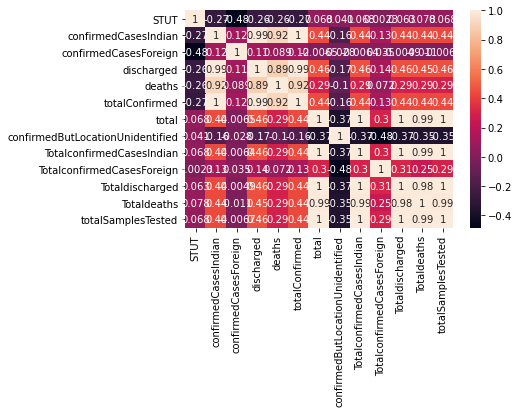

In [116]:
# plotting heatmap of correlation matrix to visualize the dependency of one attribute over another

heatmap = df3
heatmap = heatmap.drop(columns="date")
heatmap.head()
sns.heatmap(heatmap.corr(), annot = True)

In [117]:
# showing latest details

recent = intermid1[len(intermid1)-1]['regional']
recent  = pd.DataFrame(recent)

recent.rename(columns={'loc':'STUT'}, inplace=True)
recent.rename(columns={'totalConfirmed':'confirmed'}, inplace=True)

recent_x = recent.STUT



In [118]:
recent.style.background_gradient(cmap='plasma_r')

,STUT,confirmedCasesIndian,confirmedCasesForeign,discharged,deaths,confirmed,total,date,confirmedButLocationUnidentified,TotalconfirmedCasesIndian,TotalconfirmedCasesForeign,Totaldischarged,Totaldeaths
0,Andaman and Nicobar Islands,3912,0,3678,54,3912,6757131,2020-10-07,0,6757083,48,5744693,104555
1,Andhra Pradesh,729307,0,672479,6052,729307,6757131,2020-10-07,0,6757083,48,5744693,104555
2,Arunachal Pradesh,11007,0,7965,20,11007,6757131,2020-10-07,0,6757083,48,5744693,104555
3,Assam,188902,0,155077,778,188902,6757131,2020-10-07,0,6757083,48,5744693,104555
4,Bihar,190740,0,178395,925,190740,6757131,2020-10-07,0,6757083,48,5744693,104555
5,Chandigarh,12707,0,11035,180,12707,6757131,2020-10-07,0,6757083,48,5744693,104555
6,Chhattisgarh,128893,0,100551,1104,128893,6757131,2020-10-07,0,6757083,48,5744693,104555
7,Dadra and Nagar Haveli and Daman and Diu,3103,0,3000,2,3103,6757131,2020-10-07,0,6757083,48,5744693,104555
8,Delhi,295235,1,266935,5581,295236,6757131,2020-10-07,0,6757083,48,5744693,104555
9,Goa,36237,1,31050,468,36238,6757131,2020-10-07,0,6757083,48,5744693,104555


### trace1 = {
  'x': recent_x,
  'y': recent.confirmed,
  'name': 'Confirmed',
  'type': 'bar'
};
trace2 = {
  'x': recent_x,
  'y': recent.discharged,
  'name': 'Discharged',
  'type': 'bar'
};

trace3 = {
  'x': recent_x,
  'y': recent.deaths,
  'name': 'Deaths',
  'type': 'bar'
};
data = [trace1, trace2,trace3];
layout = {
  'xaxis': {'title': ' State-Data '},
  'barmode': 'relative',
  'title': 'Case Wise Disturbution'
};

fig = go.Figure(data = data, layout = layout)
pyo.iplot(fig)





In [119]:
df4['date'] = list(map(lambda x: pd.to_datetime(x), df4['date']))


In [120]:
df4['date'][5000]

Timestamp('2020-08-17 00:00:00')

In [121]:
subdf = df4[df4['STUT']==19].copy()
subdf.reset_index(inplace = True, drop = True) 
subdf

,STUT,confirmedCasesIndian,confirmedCasesForeign,discharged,deaths,totalConfirmed,total,date,confirmedButLocationUnidentified,TotalconfirmedCasesIndian,TotalconfirmedCasesForeign,Totaldischarged,Totaldeaths,totalSamplesTested
0,19,1,0,0,0,1,173,2020-03-19,0,148,25,20,4,14175.0
1,19,1,0,0,0,1,223,2020-03-20,0,191,32,23,4,15404.0
2,19,1,0,0,0,1,283,2020-03-21,0,244,39,23,4,16911.0
3,19,5,0,0,0,5,360,2020-03-22,0,319,41,24,7,18127.0
4,19,6,0,0,0,6,467,2020-03-23,34,393,40,35,8,20707.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,19,12212,0,10162,169,12212,6473544,2020-10-03,0,6473496,48,5427706,100842,77850403.0
197,19,12445,0,10598,174,12445,6623815,2020-10-04,0,6623767,48,5586703,102685,78992534.0
198,19,12445,0,10598,174,12445,6623815,2020-10-05,0,6623767,48,5586703,102685,79982394.0
199,19,12578,0,10797,177,12578,6685082,2020-10-06,0,6685034,48,5662490,103569,81071797.0


In [122]:
subdf['newCases'] = subdf['confirmedCasesIndian']
subdf['newCases'][1]
subdf['newDeaths'] = subdf['Totaldeaths']

In [123]:

subwithnew = subdf.copy()

for i in range(1,len(subdf)):
    #print(subwithnew['newCases'][0])
    subwithnew['newCases'][i] = subdf['newCases'][i]- subdf['newCases'][i-1]
    subwithnew['newDeaths'][i] = subdf['newDeaths'][i]- subdf['newDeaths'][i-1]


In [124]:
subwithnew['newDeaths']

0         4
1         0
2         0
3         3
4         1
       ... 
196    1069
197    1843
198       0
199     884
200     986
Name: newDeaths, Length: 201, dtype: int64

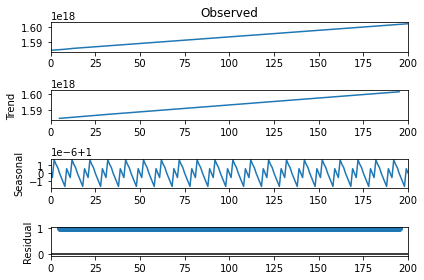

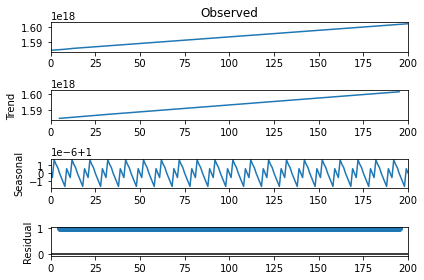

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(subwithnew['date'].values,period=10,  
                            model ='multiplicative') 
  
# ETS plot  
result.plot()

<AxesSubplot:xlabel='date'>

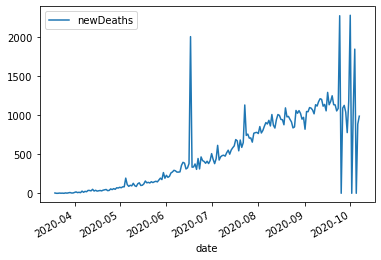

In [126]:
subwithnew.plot('date','newDeaths')


<AxesSubplot:xlabel='date'>

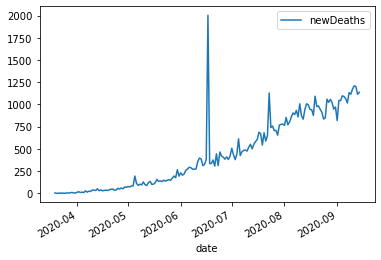

In [127]:
subwithnew=subwithnew.loc[:,['date','newDeaths']]
subwithnew=subwithnew[subwithnew['date']<'2020-09-15']
# index_no = subwithnew[(subwithnew['newDeaths']==0) & (subwithnew['date']>'2020-09-01')].index
# print(index_no)
# subwithnew.drop(index_no, inplace = True)
# subwithnew
subwithnew.plot('date','newDeaths')


In [137]:
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
    
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(subwithnew['newDeaths'].astype(float), start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = False,
                          n_jobs=-1)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Total fit time: 34.630 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  178
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1073.480
Date:                            Wed, 07 Oct 2020   AIC                           2156.960
Time:                                    14:14:50   BIC                           2172.520
Sample:                                         0   HQIC                          2163.275
                                            - 178                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.3451      9.714      0.653      0.514     -12.694      25.384
ar.L1          0.9226      0.114      8.124      0.000       0.700       1.145
ma.L1         -0.7882      0.115     -6.828      0.000      -1.014      -0.562
ma.S.L12      -0.9997      0.050    -20.127      0.000      -1.097      -0.902
sigma2      1.997e+04   1.97e-05   1.01e+09      0.000       2e+04       2e+04
===================================================================================
Ljung-Box (Q):                       20.99   Jarque-Bera (JB):             44363.17
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.23   Skew:                             7.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        81.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.08e+27. Standard errors may be unstable.
"""

In [138]:
subwithnew.count()

date         178
newDeaths    178
dtype: int64

In [139]:
# Split data into train / test sets 
train = subwithnew.iloc[:len(subwithnew)-30] 
test = subwithnew.iloc[len(subwithnew)-30:] # set one year(12 months) for testing 
#Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['newDeaths'].astype(float),  
                order = (1, 0, 1),  
                seasonal_order =(0, 1, 1, 12)) 
  
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          newDeaths   No. Observations:                  148
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -891.187
Date:                            Wed, 07 Oct 2020   AIC                           1790.374
Time:                                    14:14:50   BIC                           1802.025
Sample:                                         0   HQIC                          1795.109
                                            - 148                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   1.14e-05   8.74e+04      0.000       1.000       1.000
ma.L1         -0.8569      0.056    -15.189      0.000      -0.967      -0.746
ma.S.L12      -0.9945      0.044    -22.716      0.000      -1.080      -0.909
sigma2      2.323e+04    1.9e-06   1.22e+10      0.000    2.32e+04    2.32e+04
===================================================================================
Ljung-Box (Q):                       18.52   Jarque-Bera (JB):             36832.57
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              19.87   Skew:                             7.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        82.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.77e+24. Standard errors may be unstable.
"""

<AxesSubplot:>

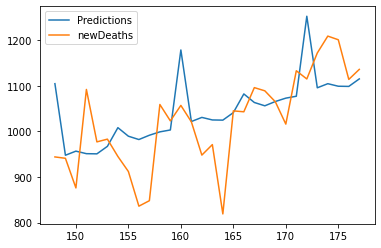

In [140]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['newDeaths'].astype(float).plot(legend = True)

In [129]:
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
    
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(subwithnew['newDeaths'].astype(float), start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = False)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2245.352, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2179.268, Time=0.32 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=2179.403, Time=0.90 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2211.478, Time=0.52 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=2179.395, Time=0.67 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=2181.415, Time=1.52 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2184.265, Time=1.00 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=2181.342, Time=1.33 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=2183.393, Time=1.65 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2246.366, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2173.831, Time=0.37 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=2175.121, Time=1.02 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=2210.987, Time=0.36 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=2175.133, Time=0.70 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=2177.131, Time=1.97

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  178
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1073.271
Date:                            Wed, 07 Oct 2020   AIC                           2156.543
Time:                                    16:16:23   BIC                           2172.103
Sample:                                         0   HQIC                          2162.859
                                            - 178                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.0824      8.392      0.606      0.545     -11.366      21.531
ar.L1          0.9368      0.099      9.454      0.000       0.743       1.131
ma.L1         -0.8068      0.100     -8.084      0.000      -1.002      -0.611
ma.S.L12      -0.9997      0.051    -19.511      0.000      -1.100      -0.899
sigma2      1.922e+04   1.45e-05   1.33e+09      0.000    1.92e+04    1.92e+04
===================================================================================
Ljung-Box (Q):                       20.36   Jarque-Bera (JB):             45012.66
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.66   Skew:                             7.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        82.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.82e+27. Standard errors may be unstable.
"""